USING DATA ANALYSIS TO GENERATE INSIGHTS FOR MICROSOFT

BUSINESS PROBLEM

The purpose of this initiative is to leverage data analysis techniques to generate valuable insights and inform strategic decision-making as Microsoft ventures into original video creation. By harnessing the power of data, we aim to gain a deeper understanding of the video content creation market, identify target audience preferences, evaluate content strategies, and assess the financial viability of this endeavor. These insights will enable Microsoft to develop a successful video content creation strategy, differentiate itself in the competitive landscape, and maximize opportunities in the evolving digital entertainment industry.

Problem Statement

The problem at hand is to leverage data analysis techniques to generate valuable insights and strategic recommendations for Microsoft's venture into original video creation. The objective is to understand the potential opportunities, challenges, and market dynamics surrounding this endeavor, enabling Microsoft to make informed decisions and develop a successful video content creation strategy.

Key Considerations are market analysis, financial viability and distribution and marketing strategies

Defining the Metric for Success

a) Data manipulation: It allows data scientists to preprocess, organize, and transform raw data into a more useful and structured format for analysis. It helps in extracting meaningful insights, identifying patterns, and preparing the data for further modeling, visualization, or statistical analysis.

b) Evolving business needs: As a data science project progresses, stakeholders may gain new insights or change their priorities, leading to alterations in the project's scope. For example, they might request additional analyses or require different metrics to be measured.

c)Analyze financial feasibility: Evaluate the financial viability of entering the movie space. Assess the potential return on investment (ROI) based on factors such as production costs, revenue streams and potential risks.

Understanding the Context

a) Market Landscape: 
 The analysis would likely involve a comprehensive examination of the video content creation market, including industry trends, competitive landscape, and consumer preferences. It would assess the current state of the market, growth opportunities, and potential challenges.

b) Production Infrastructure:
 The analysis would evaluate the necessary production infrastructure and capabilities required for video content creation. This would involve considering aspects such as content production studios, equipment, talent acquisition, content distribution platforms, and potential partnerships with production companies or content creators.

c) Financial Considerations: 
The analysis would assess the financial aspects of venturing into video content creation. This includes estimating budgets, revenue projections, return on investment, and cost management strategies to ensure a sustainable and profitable venture.

DATA RELEVANCE


The relevance of data depends on the credibility and trustworthiness of the data source. Data from reputable and reliable sources are generally considered more relevant and trustworthy. By ensuring data relevance, data scientists can improve the accuracy and applicability of their analysis, leading to more reliable insights and informed decision-making.

The files I used are both Comma Separated Value (CSV) files

i) movie_gross.csv
Analyzing the foreign gross revenue can highlight the potential opportunities for expanding your video content to international markets. If the foreign gross is a substantial portion of the total gross, it suggests that there is a global audience for video content, and it may be worth exploring international distribution and licensing opportunities.
Analyzing the performance of movies in the video content creation space can provide insights into the success factors and strategies employed by other content creators. You can identify the top-performing movies, production studios, and content creators, which can serve as benchmarks and inspiration for your own content creation efforts.

ii)movie_budgets.csv
 Analyzing movie budgets alongside box office performance can reveal market dynamics and trends. It helps identify successful strategies, budget ranges associated with different levels of commercial success, and audience preferences. This information can guide your decision-making process and provide insights into optimizing budgets for maximum impact.
 Movie budgets give you an understanding of the production costs involved in creating video content. By analyzing historical data, you can get a sense of the typical budget range for different types of movies or video content projects. This helps you estimate the financial resources required for your own content creation endeavors.
 

DATA UNDERSTANDING


i) Contextual Understanding:
Data understanding allows you to gain a comprehensive understanding of the project's background, objectives, and scope. It helps you identify the data sources, data collection methods, and any limitations or biases associated with the data. This contextual understanding is crucial for conducting a meaningful analysis and interpreting the results accurately.

ii) Data Quality Assessment: 
Data understanding involves assessing the quality of the data. It helps you identify any data issues such as missing values, outliers, inconsistencies, or errors. By understanding the data quality, you can make informed decisions on how to handle or address these issues during the analysis phase. Ensuring data quality is essential for generating reliable insights and making sound business decisions.


In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [247]:
df_gross = pd.read_csv('Data\movies_gross.csv')
df_budgets = pd.read_csv('Data\movie_budgets.csv')

In [248]:
#investigate the data shape

df_gross.shape

(3387, 5)

In [249]:
#investigate the data shape
df_budgets.shape

(5782, 6)

In [250]:
#investigate the data types 
df_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [251]:
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [252]:
df_gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross   
0                                     Toy Story 3          BV     415000000.0  \
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [253]:
df_gross.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross   
0                                     Toy Story 3          BV     415000000.0  \
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

DATA PREPARATION

Data preparation, also known as data preprocessing, is a crucial step in data science and involves transforming raw data into a clean, organized, and structured format suitable for analysis. It encompasses a series of operations and techniques applied to the data to address issues such as missing values, outliers, inconsistencies, and formatting discrepancies. Data preparation is essential as it helps improve the quality, reliability, and usability of the data for subsequent analysis and modeling tasks.

In [254]:
#Data integration, my list of df
list_of_dataframes = [df_budgets, df_gross ]
df = pd.concat(list_of_dataframes)

In [255]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title,studio,foreign_gross,year
0,1.0,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2.0,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN,NaN,NaN
2,3.0,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN
3,4.0,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN,NaN,NaN
4,5.0,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN


In [256]:
df.dtypes

id                   float64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
title                 object
studio                object
foreign_gross         object
year                 float64
dtype: object

In [257]:
#find missing values for the column production budget 
df['production_budget'].isna().sum()

3387

In [258]:
#drop missing values 
df['production_budget'].dropna()

0       $425,000,000 
1       $410,600,000 
2       $350,000,000 
3       $330,600,000 
4       $317,000,000 
            ...      
5777          $7,000 
5778          $6,000 
5779          $5,000 
5780          $1,400 
5781          $1,100 
Name: production_budget, Length: 5782, dtype: object

In [259]:
df['foreign_gross'].isna().sum()

7132

In [260]:
df.dropna(subset=['domestic_gross', 'worldwide_gross'])


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title,studio,foreign_gross,year
0,1.0,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2.0,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN,NaN,NaN
2,3.0,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN
3,4.0,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN,NaN,NaN
4,5.0,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78.0,31-Dec-18,Red 11,"$7,000",$0,$0,NaN,NaN,NaN,NaN
5778,79.0,2-Apr-99,Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN
5779,80.0,13-Jul-05,Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN
5780,81.0,29-Sep-15,A Plague So Pleasant,"$1,400",$0,$0,NaN,NaN,NaN,NaN


In [261]:
df['studio'].isna().sum()

5787

In [262]:
#drop missing values in studio column
df['studio'].dropna()

0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3382, dtype: object

In [263]:
#count per studio
studio_count = df['studio'].value_counts()

In [264]:
print(studio_count)

studio
IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 257, dtype: int64


In [265]:
top_5_studios = studio_count.iloc[:5]
top_5_studios

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
Name: count, dtype: int64

In [266]:
#filter data on relevant columns 
relevant_columns = [
    "movie",
    "production_budget",
    "worldwide_gross",
    "domestic_gross",
    "studio"
]
df= df[relevant_columns]
df.shape

(9169, 5)

In [267]:
df.drop_duplicates(inplace=True)

In [268]:
#remove commas from object column 
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
print(df['production_budget'])

0       425000000 
1       410600000 
2       350000000 
3       330600000 
4       317000000 
           ...    
3382           NaN
3383           NaN
3384           NaN
3385           NaN
3386           NaN
Name: production_budget, Length: 8982, dtype: object


In [285]:
#remove inconsistenties in the worldwide gross 
#df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
#df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
#df['worldwide_gross'] = df['worldwide_gross'].str.replace('.', '')
#df['worldwide_gross'] = df['worldwide_gross'].str.replace('+', '')
#df['worldwide_gross'] = df['worldwide_gross'].str.replace('e', '')
#print(df['worldwide_gross'])

AttributeError: Can only use .str accessor with string values!

In [270]:
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
print(df['domestic_gross'])

0       760507625 
1       241063875 
2        42762350 
3       459005868 
4       620181382 
           ...    
3382           NaN
3383           NaN
3384           NaN
3385           NaN
3386           NaN
Name: domestic_gross, Length: 8982, dtype: object


In [271]:
#convert these columns to float
columns_to_convert = ["production_budget", "worldwide_gross", "domestic_gross", ]
df[columns_to_convert] = df[columns_to_convert].astype(float)

print(df.dtypes)

movie                 object
production_budget    float64
worldwide_gross      float64
domestic_gross       float64
studio                object
dtype: object


In [272]:
#drop rows with missing values
df = df.dropna(subset= ['production_budget'])
df['production_budget'].shape

(5782,)

In [273]:
df = df.dropna(subset= ['worldwide_gross'])
df['worldwide_gross'].shape

(5782,)

In [274]:
# Get the top 10 values from column production budget 
top_10_pro_budget = df['production_budget'].nlargest(10)
top_10_pro_budget

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
5    306000000.0
6    300000000.0
7    300000000.0
8    300000000.0
9    300000000.0
Name: production_budget, dtype: float64

In [287]:
df['worldwide_gross'] = df['worldwide_gross'].astype(str)

print(df['worldwide_gross'])


0       2776345279.0
1       1045663875.0
2        149762350.0
3       1403013963.0
4       1316721747.0
            ...     
5777             0.0
5778        240495.0
5779          1338.0
5780             0.0
5781        181041.0
Name: worldwide_gross, Length: 5782, dtype: object


In [276]:
top_10_dom_gross = df['domestic_gross'].nlargest(10)
top_10_dom_gross

5     936662225.0
0     760507625.0
41    700059566.0
6     678815482.0
42    659363944.0
33    652270625.0
26    623279547.0
4     620181382.0
43    608581744.0
74    533720947.0
Name: domestic_gross, dtype: float64

In [277]:
df.columns

Index(['movie', 'production_budget', 'worldwide_gross', 'domestic_gross',
       'studio'],
      dtype='object')

In [278]:


# Display the first few rows of the data
df.head()


,movie,production_budget,worldwide_gross,domestic_gross,studio
0,Avatar,425000000.0,2.776345e+09,760507625.0,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,241063875.0,NaN
2,Dark Phoenix,350000000.0,1.497624e+08,42762350.0,NaN
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,459005868.0,NaN
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,620181382.0,NaN


In [279]:
df['production_budget'] = df['production_budget'].astype(float)

print(df['production_budget'])

0       425000000.0
1       410600000.0
2       350000000.0
3       330600000.0
4       317000000.0
           ...     
5777         7000.0
5778         6000.0
5779         5000.0
5780         1400.0
5781         1100.0
Name: production_budget, Length: 5782, dtype: float64


DATA ANALYSIS

1) Production Infrastructure

A movie studio plays a crucial role in the process of making movies. Here we want to investigate the top 5 highest production teams. In my exploration I found that the following studios have produced the most films. 

By looking at the studios to point out the reasons development and acquisition of projects. Movie studios actively participate in the development and acquisition of film projects. They often have in-house development teams that identify potential scripts, story ideas, or intellectual properties that have the potential for successful adaptation into films.

 Financing aspect: Movie studios provide the financial backing necessary to bring a movie project to life. They invest in various aspects of film production, including pre-production, casting, hiring crew members, production equipment, location scouting, set design, and post-production. The studio allocates the budget for each project and ensures that the necessary financial resources are available throughout the production process.

 Distribution and Marketing: Once a movie is completed, the studio takes on the responsibility of distributing and marketing the film to audiences worldwide.
 The top 5 studios in the world right now are IFC, Uni, WB, Fox, Magn and we can infer that these studios are successful because of their distribution and marketing channels, financial acquisitions and a near excellent in-house development team.

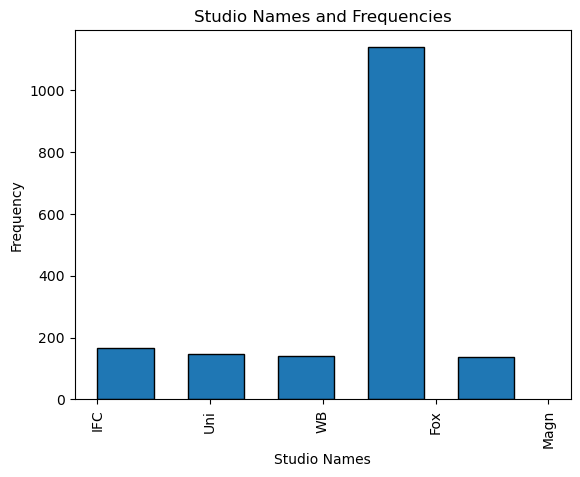

In [280]:
#Examining the top 5 studios 

studio_names = ['IFC', 'Uni', 'WB', 'Fox', 'Magn']
frequencies = [166, 147, 140, 1136, 136]
plt.hist(studio_names, bins=len(studio_names), weights=frequencies, width=0.5, edgecolor='black')
plt.tick_params(axis="x", labelrotation=90)
plt.xlabel('Studio Names')
plt.ylabel('Frequency')
plt.title('Studio Names and Frequencies')
plt.show()

2. Financial Feasibility

 Comparing the production budget with the domestic gross revenue allows for an assessment of the film's profitability. If the gross revenue exceeds the production budget by a significant margin, it suggests that the film has generated substantial profits. On the other hand, if the gross revenue falls short of the production budget, it may indicate potential financial challenges or a less financially feasible project.

The production budget represents the total expenses incurred in producing a film and also serves as a baseline for estimating the financial investment required to bring the film to completion.

 Domestic gross revenue refers to the total earnings generated by a film, typically through box office ticket sales and also reflects the financial success of a film and is a key indicator of its commercial viability.

 Here we see that a higher production budget results directly to a higher average profit as compared to any lower than production budget.

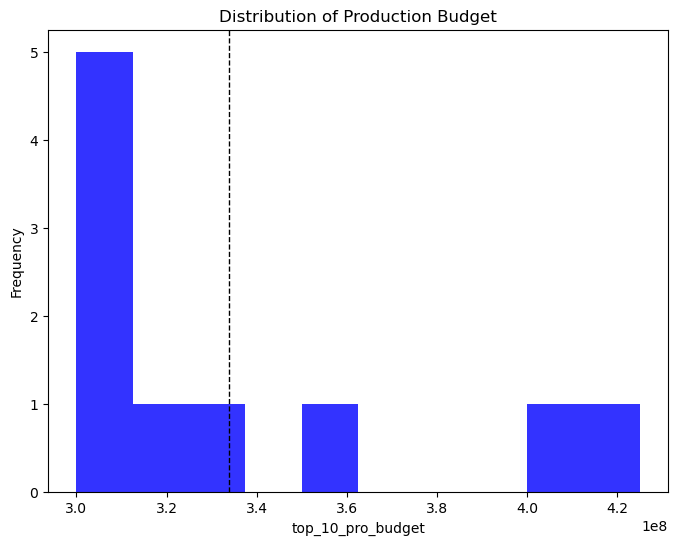

In [281]:
#distributiom of production budget

top_10_pro_budget  = df['production_budget'].nlargest(10)
mean_top_10_pro_budget  = top_10_pro_budget.mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(top_10_pro_budget , bins=10, alpha=0.8, color='blue')
ax.axvline(mean_top_10_pro_budget, color='black', linestyle='dashed', linewidth=1)
ax.set_title('Distribution of Production Budget')
ax.set_xlabel('top_10_pro_budget')
ax.set_ylabel('Frequency')
plt.show()

In [282]:
top_10_pro_budget.mean()
top_10_pro_budget.median()
top_10_pro_budget.std()
print(top_10_pro_budget.mean())
print(top_10_pro_budget.median())
print(top_10_pro_budget.std())

333920000.0
311500000.0
47273502.0915523


3. Market Landscape


In [284]:
#top 10 producing movies 
df.sort_values('production_budget', ascending=False).head(10)

,movie,production_budget,worldwide_gross,domestic_gross,studio
0,Avatar,425000000.0,2.776345e+09,760507625.0,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,241063875.0,NaN
2,Dark Phoenix,350000000.0,1.497624e+08,42762350.0,NaN
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,459005868.0,NaN
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,620181382.0,NaN
5,Star Wars Ep. VII: The Force Awakens,306000000.0,2.053311e+09,936662225.0,NaN
6,Avengers: Infinity War,300000000.0,2.048134e+09,678815482.0,NaN
7,Pirates of the Caribbean: At Worldâs End,300000000.0,9.634204e+08,309420425.0,NaN
8,Justice League,300000000.0,6.559452e+08,229024295.0,NaN
9,Spectre,300000000.0,8.796209e+08,200074175.0,NaN


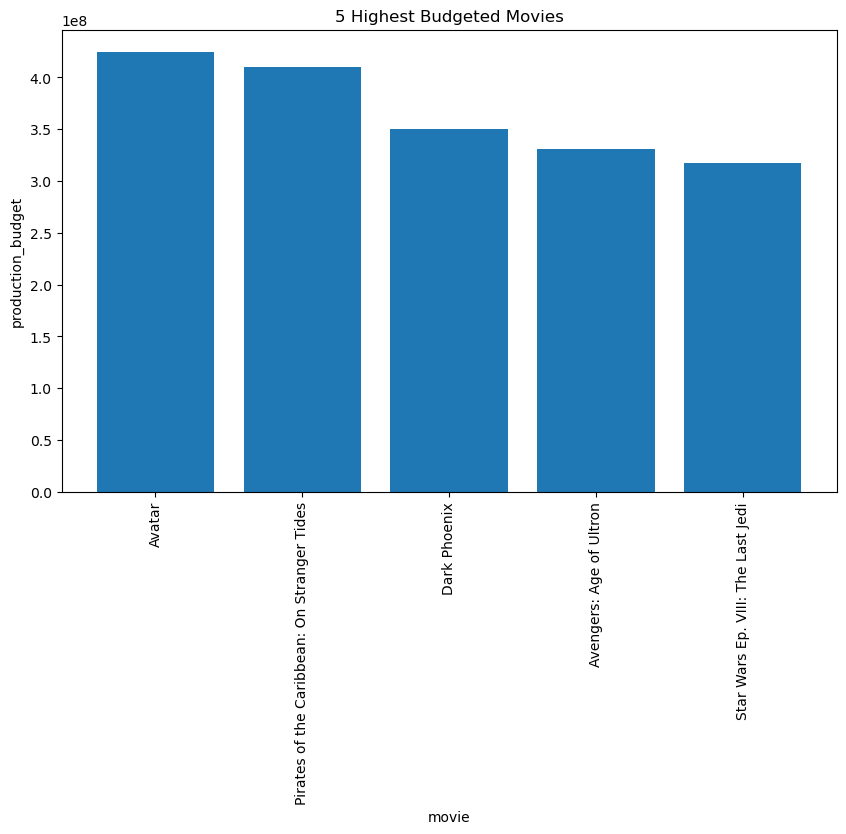

In [291]:
bar_chart_movies = ['Avatar', 'Pirates of the Caribbean: On Stranger Tides', 'Dark Phoenix', 'Avengers: Age of Ultron', 'Star Wars Ep. VIII: The Last Jedi']


bar_chart_title = '5 Highest Budgeted Movies'
bar_chart_count_label = 'production_budget'
bar_chart_series_label = 'movie'


# YOUR CODE HERE
bar_chart_counts = df['production_budget'].nlargest(5)
_figure, ax = plt.subplots(figsize=(10, 6))
ax.bar(bar_chart_movies, bar_chart_counts)
ax.set_title(bar_chart_title)
ax.tick_params(axis="x", labelrotation=90)
ax.set_xlabel(bar_chart_series_label)
ax.set_ylabel(bar_chart_count_label)
plt.show();